In [4]:
import tensorflow as tf

from numpy import genfromtxt
from sklearn import preprocessing, model_selection
from tensorflow import keras
from tensorflow.metrics import precision
import matplotlib.pyplot as plt 

features = genfromtxt('../datasets/final-data/features.csv', delimiter=',')
labels = genfromtxt('../datasets/final-data/labels.csv', delimiter=',')
embedding_matrix = genfromtxt('../datasets/final-data/embedding_matrix.csv', delimiter=',')

train_x, test_x, train_y, test_y = model_selection.train_test_split(features,labels,test_size = 0.3, random_state = 0)

In [9]:
train_x.shape

(2949, 20)

In [37]:
input_dim = len(embedding_matrix)

model = keras.Sequential()

model.add(
    keras.layers.Embedding(
        input_dim = input_dim,
        output_dim = 300, # The output dimensions will be 300(the word vector dimension)
        weights = [embedding_matrix], # Pre loading the weights with the word vectors
        input_length = 20, # The max length of the sentences
        mask_zero = True, # Use zero as default value when missing the word
        trainable = False # Disable tensorflow from re-training the word vectors
    )
)

model.add(keras.layers.LSTM(units = 100, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(3,activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 20, 300)           2079900   
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 303       
Total params: 2,240,603
Trainable params: 160,703
Non-trainable params: 2,079,900
_________________________________________________________________


In [38]:
model.compile(optimizer= tf.train.AdamOptimizer(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(
    train_x, 
    train_y, 
    epochs = 20, 
    validation_split=0.2, 
    batch_size = 32,  
    verbose=1, 
    shuffle=True,
    callbacks=[early_stop]
)

Train on 2359 samples, validate on 590 samples
Epoch 1/20
2359/2359 [==============================] - 6s 3ms/sample - loss: 0.7763 - acc: 0.5032 - val_loss: 0.7466 - val_acc: 0.5136
Epoch 2/20
2359/2359 [==============================] - 5s 2ms/sample - loss: 0.7338 - acc: 0.5345 - val_loss: 0.7405 - val_acc: 0.5254
Epoch 3/20
2359/2359 [==============================] - 4s 2ms/sample - loss: 0.7200 - acc: 0.5723 - val_loss: 0.7380 - val_acc: 0.5627
Epoch 4/20
2359/2359 [==============================] - 4s 2ms/sample - loss: 0.7044 - acc: 0.6087 - val_loss: 0.7496 - val_acc: 0.5339
Epoch 5/20
2359/2359 [==============================] - 4s 2ms/sample - loss: 0.6734 - acc: 0.6316 - val_loss: 0.7395 - val_acc: 0.5678
Epoch 6/20
2359/2359 [==============================] - 5s 2ms/sample - loss: 0.6392 - acc: 0.6719 - val_loss: 0.7583 - val_acc: 0.5475
Epoch 7/20
2359/2359 [==============================] - 6s 2ms/sample - loss: 0.5929 - acc: 0.6978 - val_loss: 0.7981 - val_acc: 0.5424
E

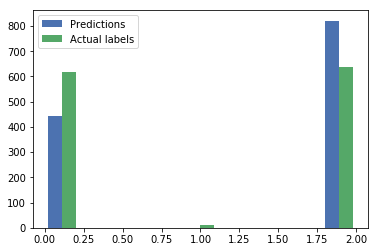

In [50]:
import numpy as np
predictions = model.predict(
    test_x,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)


predictions = np.argmax(predictions, axis=1)

plt.style.use('seaborn-deep')

bins = np.linspace(0, 2, 10)

plt.hist([predictions, test_y], bins, label=['Predictions', 'Actual labels'])
plt.legend(loc='upper left')
plt.show()


In [69]:
from sklearn.metrics import precision_recall_fscore_support

metrics = precision_recall_fscore_support(y_true=test_y, y_pred=predictions, average=None)

metrics = metrics[0:3]

metrics

/Users/gcarvs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([0.53153153, 0.        , 0.5274056 ]),
 array([0.38311688, 0.        , 0.67868339]),
 array([0.44528302, 0.        , 0.59355723]))